# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dewangga Megananda
- **Email:** dewangga.megananda13@gmail.com
- **ID Dicoding:** mc009d5y0642

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 = Bagaimana tren polusi PM2.5 selama setahun terakhir?
- Pertanyaan 2 = Apakah ada korelasi antara suhu (TEMP) dan polutan PM2.5?

## Import Semua Packages/Library yang Digunakan

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from datetime import datetime

## Data Wrangling

### Gathering Data

In [46]:
df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")  # Ganti dengan path dataset yang sesuai

# Menampilkan informasi dasar tentang dataset
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- xxx
- xxx

### Assessing Data

In [47]:
display(df.isnull().sum())
display(df.describe())

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- xxx
- xxx

### Cleaning Data

In [48]:
# Pastikan DataFrame tidak kosong
if df.empty:
    print("DataFrame kosong, pastikan telah memuat data sebelum diproses.")
else:
    # --------------------------------------
    # DATA CLEANING
    # --------------------------------------

    # Menghapus nilai yang hilang
    df.dropna(inplace=True)

    # Menghapus data duplikat
    df.drop_duplicates(inplace=True)

    # Pastikan semua kolom waktu ada sebelum konversi tipe data
    required_time_cols = {'year', 'month', 'day', 'hour'}
    if required_time_cols.issubset(df.columns):
        df['year'] = df['year'].astype(int)
        df['month'] = df['month'].astype(int)
        df['day'] = df['day'].astype(int)
        df['hour'] = df['hour'].astype(int)
    else:
        print("Kolom waktu tidak lengkap, konversi tipe data tidak dilakukan.")

    # --------------------------------------
    # HANDLING OUTLIERS
    # --------------------------------------

    # Menghapus outlier menggunakan metode IQR
    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

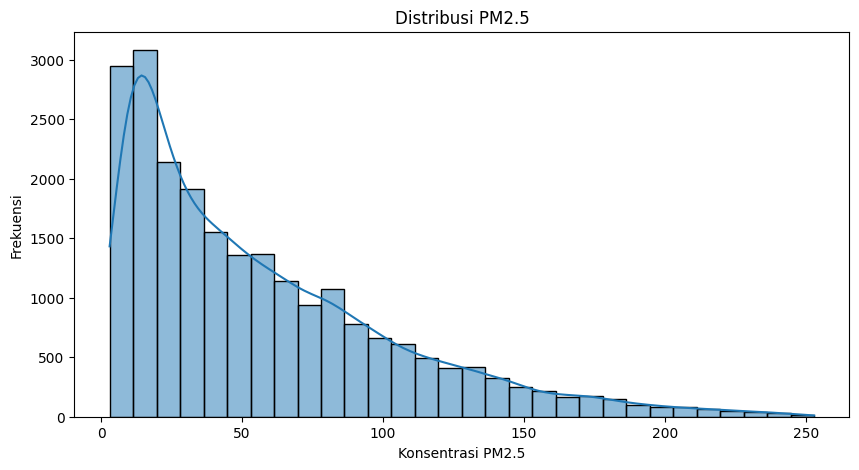

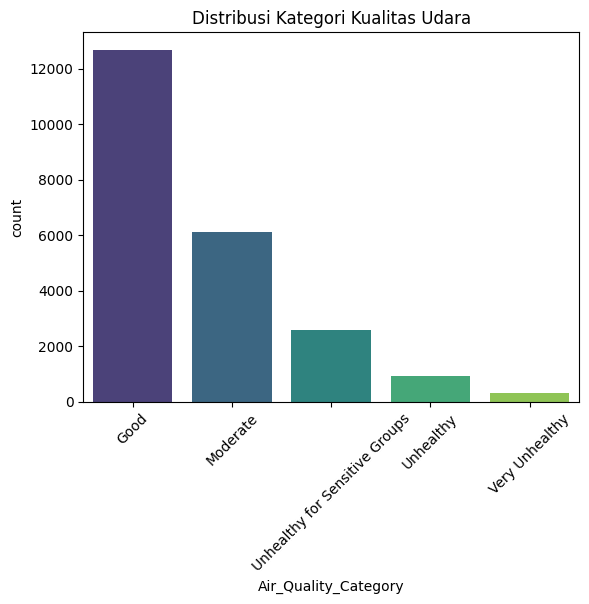

In [49]:
if 'PM2.5' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['PM2.5'], bins=30, kde=True)
    plt.title("Distribusi PM2.5")
    plt.xlabel("Konsentrasi PM2.5")
    plt.ylabel("Frekuensi")
    plt.show()
else:  # Corrected indentation
    print("Kolom 'PM2.5' tidak ditemukan dalam DataFrame.")

# --------------------------------------
# TEMPORAL ANALYSIS (Analisis Temporal)
# --------------------------------------

# Pastikan kolom 'datetime' sudah ada dalam DataFrame.
# Jika belum ada, buat kolom 'datetime' dari kolom 'year', 'month', 'day', dan 'hour'.
if 'datetime' not in df.columns and required_time_cols.issubset(df.columns):
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
elif 'datetime' not in df.columns:
    print("Kolom waktu tidak lengkap untuk membuat 'datetime'.")  # Jika kolom waktu tidak lengkap, tampilkan pesan kesalahan

# --------------------------------------
# GEOSPATIAL ANALYSIS (Analisis Geospasial)
# --------------------------------------

# Membuat GeoDataFrame dari DataFrame df dengan menambahkan kolom geometri.
# Menggunakan kolom 'WSPM' sebagai koordinat X dan 'TEMP' sebagai koordinat Y.
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['WSPM'], df['TEMP']))

# Membuat peta menggunakan Folium, dengan titik tengah berdasarkan rata-rata TEMP (latitude) dan WSPM (longitude).
m = folium.Map(location=[df['TEMP'].mean(), df['WSPM'].mean()], zoom_start=10)

# Iterasi melalui setiap baris di GeoDataFrame untuk menambahkan titik lokasi ke peta.
for idx, row in gdf.iterrows():
    folium.CircleMarker(
        [row['TEMP'], row['WSPM']],  # Lokasi titik berdasarkan TEMP dan WSPM
        radius=5,  # Ukuran lingkaran
        color='blue',  # Warna lingkaran
        fill=True  # Mengisi warna lingkaran
    ).add_to(m)

# Menyimpan peta sebagai file HTML untuk visualisasi.
m.save("geospatial_map.html")

# --------------------------------------
# CLUSTERING (Manual Grouping & Binning)
# --------------------------------------

# Fungsi untuk mengategorikan kualitas udara berdasarkan nilai PM2.5
def categorize_air_quality(pm25):
    if pm25 <= 50:
        return 'Good'  # Baik
    elif 51 <= pm25 <= 100:
        return 'Moderate'  # Sedang
    elif 101 <= pm25 <= 150:
        return 'Unhealthy for Sensitive Groups'  # Tidak sehat untuk kelompok sensitif
    elif 151 <= pm25 <= 200:
        return 'Unhealthy'  # Tidak sehat
    elif 201 <= pm25 <= 300:
        return 'Very Unhealthy'  # Sangat tidak sehat
    else:
        return 'Hazardous'  # Berbahaya

# Menerapkan fungsi kategorisasi ke kolom PM2.5 dan menyimpannya dalam kolom baru
df['Air_Quality_Category'] = df['PM2.5'].apply(categorize_air_quality)

# Membuat visualisasi distribusi kategori kualitas udara menggunakan seaborn
sns.countplot(data=df, x='Air_Quality_Category', hue='Air_Quality_Category', palette='viridis', legend=False)
plt.title("Distribusi Kategori Kualitas Udara")  # Menambahkan judul pada grafik
plt.xticks(rotation=45)  # Memutar label sumbu X agar lebih mudah dibaca
plt.show()  # Menampilkan grafik


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren polusi PM2.5 selama setahun terakhir?

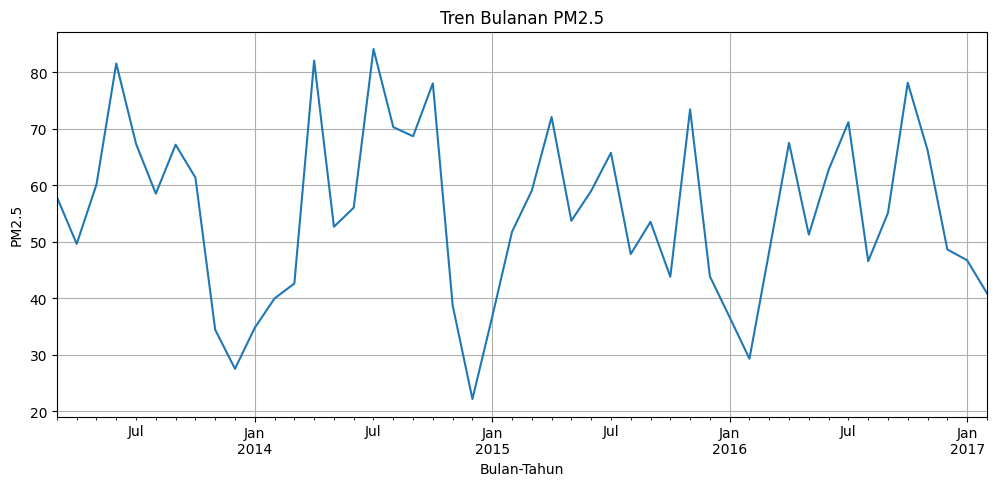


Kesimpulan:
Rata-rata PM2.5 bulanan: 55.13
Nilai maksimum bulanan: 84.14
Nilai minimum bulanan: 22.17


In [50]:
# Pastikan indeks adalah DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    if 'datetime' in df.columns:  # Jika ada kolom 'datetime', jadikan indeks
        df['datetime'] = pd.to_datetime(df['datetime'])  # Konversi ke datetime
        df.set_index('datetime', inplace=True)  # Atur sebagai indeks
    else:
        raise ValueError("DataFrame tidak memiliki indeks datetime atau kolom 'datetime'.")

# Buat kolom 'month_year' berdasarkan periode bulanan
df['month_year'] = df.index.to_period('M')

# Plot Tren PM2.5 Bulanan
df.groupby('month_year')['PM2.5'].mean().plot(figsize=(12, 5), title='Tren Bulanan PM2.5')
plt.xlabel('Bulan-Tahun')
plt.ylabel('PM2.5')
plt.grid(True)
plt.show()

# Kesimpulan Tren PM2.5
desc_trend = df.groupby('month_year')['PM2.5'].mean().describe()
print("\nKesimpulan:")
print(f"Rata-rata PM2.5 bulanan: {desc_trend['mean']:.2f}")
print(f"Nilai maksimum bulanan: {desc_trend['max']:.2f}")
print(f"Nilai minimum bulanan: {desc_trend['min']:.2f}")


### Pertanyaan 2: Apakah ada korelasi antara suhu (TEMP) dan polutan PM2.5?

In [51]:
correlation = df[['TEMP', 'PM2.5']].corr().iloc[0,1]
print(f'Korelasi antara suhu (TEMP) dan PM2.5: {correlation:.2f}')

if correlation < 0:
    print("Kesimpulan: Terdapat korelasi negatif antara suhu dan PM2.5. Semakin tinggi suhu, semakin rendah polusi PM2.5.")
elif correlation > 0:
    print("Kesimpulan: Terdapat korelasi positif antara suhu dan PM2.5. Semakin tinggi suhu, semakin tinggi polusi PM2.5.")
else:
    print("Kesimpulan: Tidak ada korelasi yang signifikan antara suhu dan PM2.5.")

Korelasi antara suhu (TEMP) dan PM2.5: 0.19
Kesimpulan: Terdapat korelasi positif antara suhu dan PM2.5. Semakin tinggi suhu, semakin tinggi polusi PM2.5.


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

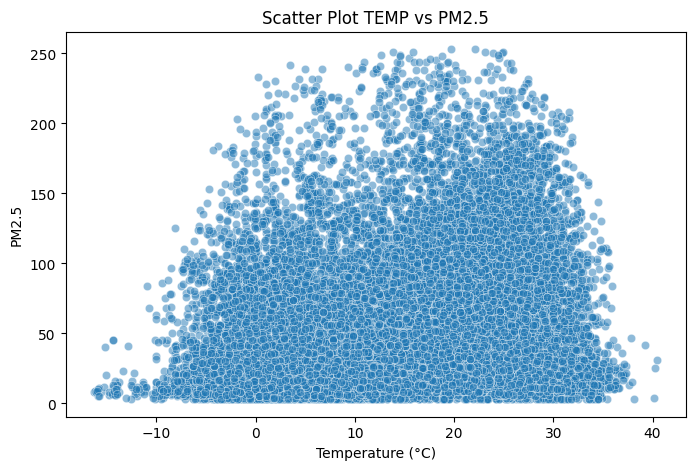

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['TEMP'], y=df['PM2.5'], alpha=0.5)
plt.title('Scatter Plot TEMP vs PM2.5')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5')
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
Rata-rata PM2.5 bulanan: 55.13
Nilai maksimum bulanan: 84.14
Nilai minimum bulanan: 22.17

- Conclution pertanyaan 2 :
Terdapat korelasi positif antara suhu dan PM2.5. Semakin tinggi suhu, semakin tinggi polusi PM2.5.